# Play-Store 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("googleplaystore.csv") 

In [3]:
data.head() # getting info of first five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info() # to see columns info about non null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.describe() # check descriptive stats.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
data.isnull().sum() # see null (missing) values.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data.drop_duplicates(subset =['App'],keep = 'first', inplace = True) # remove duplicate rows which have same application name.

In [8]:
data[data.duplicated()] # check if there are any duplicate rows.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


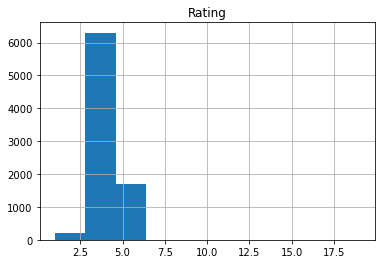

In [9]:
data.hist() # check outliers.
plt.show()

In [10]:
data[data.Rating > 5] # check outlier present in which row.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data.drop([10472], inplace = True) # remove outlier.

In [12]:
rmedian = data.Rating.median()
rmedian

4.3

In [13]:
data["Rating"].value_counts() # to see rating counts and see if there are other values present or not eg. $,#.

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
4.1    621
4.0    513
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
2.1      8
1.8      8
1.7      8
1.6      4
1.5      3
1.4      3
1.2      1
Name: Rating, dtype: int64

In [14]:
data['Rating'].fillna(rmedian, inplace = True) # fill missing values.

In [15]:
# filling missing values with modes of categorical columns with mode.
print(data['Type'].mode())
print(data['Current Ver'].mode())
print(data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


above mode values are unimodal values and sometimes there are bimodal values also.

In [16]:
# fill categorical values by mode values, sometimes we get bimodal values thats why select first mode value by values[0]

data['Type'].fillna(str(data['Type'].mode().values[0]), inplace = True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace = True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace = True)

In [17]:
data.isna().sum() # check missing values.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
data.info() # see data types of columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [19]:
data.Price.value_counts() # to see why price col showing object type if there are any object(string) values.

0          8903
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$379.99       1
$4.59         1
$3.02         1
$15.46        1
$1.96         1
Name: Price, Length: 92, dtype: int64

In [20]:
data.Reviews.value_counts() # to see why Reviews col showing object type if there are any object(string) values.

0         593
1         272
2         213
3         170
4         137
         ... 
9464        1
8100        1
244863      1
62561       1
27104       1
Name: Reviews, Length: 5330, dtype: int64

In [21]:
data.Installs.value_counts() # to see why Installs col showing object type if there are any object(string) values.

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

convert Price, Reviews, Installs columns into float datatype.

In [22]:
# In Price col replace '$' with empty string ''.

data['Price'] = data['Price'].apply( lambda x : str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].astype('float')

In [23]:
data['Reviews'] = data['Reviews'].astype('float') # data['Reviews'] = data['Reviews'].apply( lambda x : float(x))

In [24]:
# In Installs col replace '+' and ',' with empty string ''.

data['Installs'] = data['Installs'].apply( lambda x : str(x).replace('+', '') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].apply( lambda x : str(x).replace(',', '') if ',' in str(x) else str(x))

data['Installs'] = data['Installs'].astype('float')

In [25]:
data.info() # check datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


In [26]:
data.describe() # see mean of each columns.

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,7.777507e+06,1.099299
std,0.496397,1.831320e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [27]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 1. Which category contains more apps?

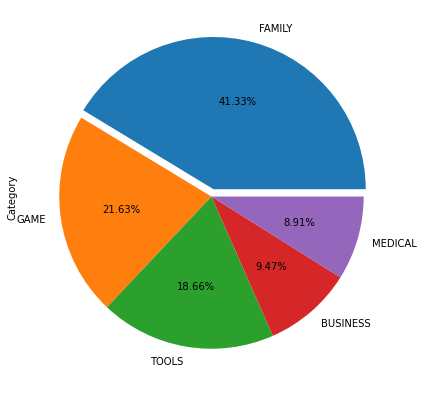

In [28]:
plt.figure(figsize=(10,7))
data["Category"].value_counts().nlargest(5).plot.pie(autopct="%1.2f%%", explode=(0.05,0,0,0,0))
plt.show()

#see only top 5 categories by using nlargest.

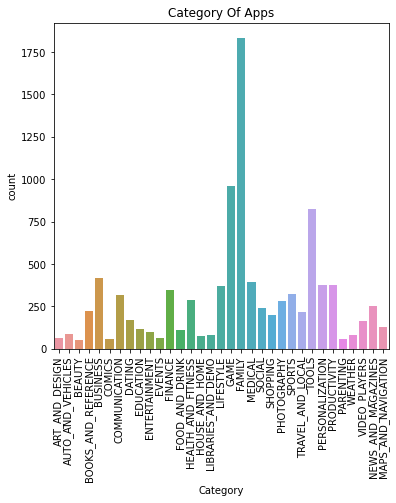

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x="Category")
plt.title("Category Of Apps")
plt.xticks(rotation=90)
plt.show()

family category contains more apps.

In [30]:
data.Category.value_counts() # To see excat count of which category has how many apps.

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [31]:
# storing groupby category in grp variable
grp = data.groupby('Category') 

# 2. which app possess maximum installs ?

In [32]:
x = grp['Installs'].max()
x 

Category
ART_AND_DESIGN         5.000000e+07
AUTO_AND_VEHICLES      1.000000e+07
BEAUTY                 1.000000e+07
BOOKS_AND_REFERENCE    1.000000e+09
BUSINESS               1.000000e+08
COMICS                 1.000000e+07
COMMUNICATION          1.000000e+09
DATING                 1.000000e+07
EDUCATION              1.000000e+08
ENTERTAINMENT          1.000000e+09
EVENTS                 5.000000e+06
FAMILY                 1.000000e+08
FINANCE                1.000000e+08
FOOD_AND_DRINK         1.000000e+07
GAME                   1.000000e+09
HEALTH_AND_FITNESS     5.000000e+08
HOUSE_AND_HOME         1.000000e+07
LIBRARIES_AND_DEMO     1.000000e+07
LIFESTYLE              1.000000e+08
MAPS_AND_NAVIGATION    1.000000e+08
MEDICAL                5.000000e+06
NEWS_AND_MAGAZINES     1.000000e+09
PARENTING              1.000000e+07
PERSONALIZATION        1.000000e+08
PHOTOGRAPHY            1.000000e+09
PRODUCTIVITY           1.000000e+09
SHOPPING               1.000000e+08
SOCIAL             

ART_AND_DESIGN, EVENTS, HEALTH_AND_FITNESS, MEDICAL, WEATHER app possessed maximum installs.    

# 3. Which category possess maximum rating average.

In [33]:
y = grp['Rating'].mean() # rating average mean using groupby category.

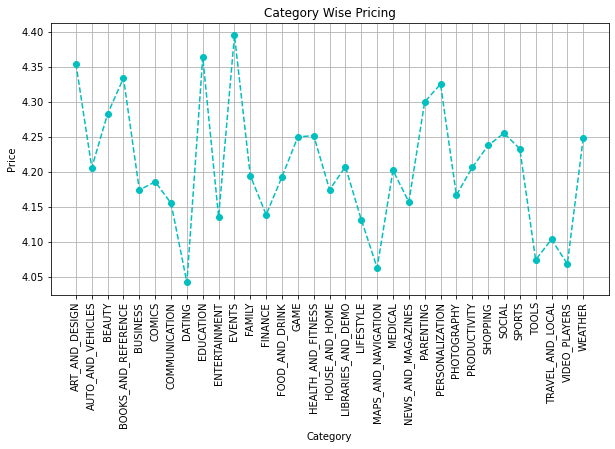

In [34]:
plt.figure(figsize = (10,5))
plt.plot(y,'ro--',color = 'c')
plt.xticks(rotation=90)
plt.title("Category Wise Pricing")
plt.xlabel("Category")
plt.ylabel("Price")
plt.grid()
plt.show()

In [35]:
y

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

Following category possessed maximum rating average 
1. EVENTS
2. EDUCATION
3. ART_AND_DESIGN
4. BOOKS_AND_REFERENCE  
5. PERSONALIZATION

# 4. Content rating of apps.

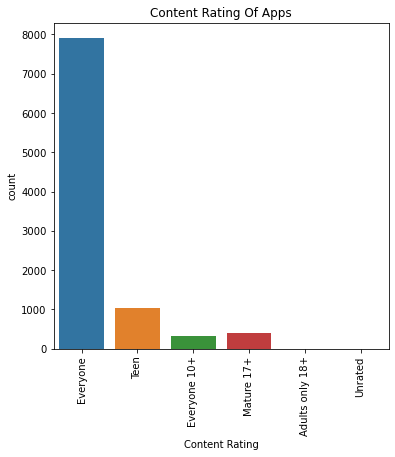

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(data=data,x="Content Rating")
plt.title("Content Rating Of Apps")
plt.xticks(rotation=90)
plt.show()

In [37]:
data['Content Rating'].value_counts() # to see exact count of which content has more apps.

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# 5. which category has max reviews?

In [38]:
r = grp['Reviews'].mean() # reviews average mean using groupby category.

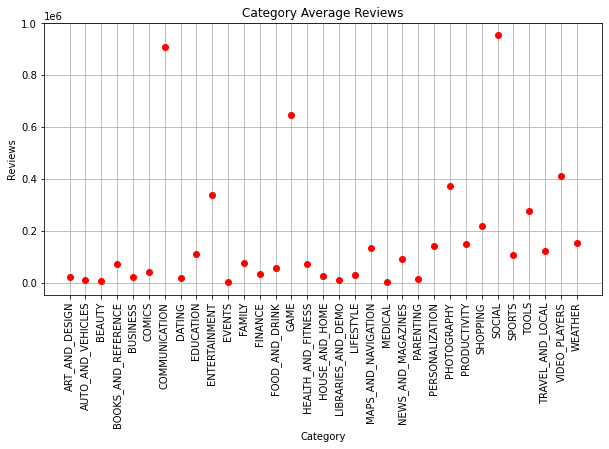

In [39]:
plt.figure(figsize = (10,5))
plt.plot(r,'ro',color = 'r')
plt.xticks(rotation=90)
plt.title("Category Average Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.grid()
plt.show()

In [40]:
r

Category
ART_AND_DESIGN          22175.046875
AUTO_AND_VEHICLES       13690.188235
BEAUTY                   7476.226415
BOOKS_AND_REFERENCE     75321.234234
BUSINESS                23548.202381
COMICS                  41822.696429
COMMUNICATION          907337.676190
DATING                  21190.315789
EDUCATION              112303.764706
ENTERTAINMENT          340810.294118
EVENTS                   2515.906250
FAMILY                  78507.362445
FINANCE                 36701.756522
FOOD_AND_DRINK          56473.464286
GAME                   648903.763295
HEALTH_AND_FITNESS      74171.371528
HOUSE_AND_HOME          26079.013514
LIBRARIES_AND_DEMO      10795.607143
LIFESTYLE               32066.859079
MAPS_AND_NAVIGATION    135337.007634
MEDICAL                  2994.863291
NEWS_AND_MAGAZINES      91063.889764
PARENTING               15972.183333
PERSONALIZATION        142401.808511
PHOTOGRAPHY            374915.551601
PRODUCTIVITY           148638.098930
SHOPPING               220553

Following category has maximum revies average
1. SOCIAL
2. COMMUNICATION
3. GAME

# 6. Number of Free and Paid apps.

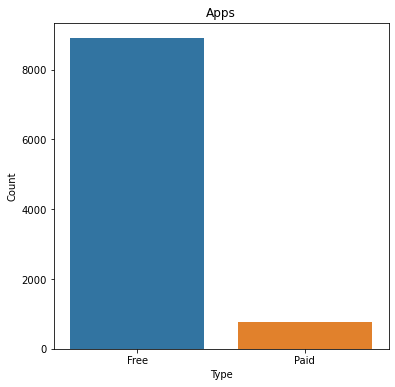

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x="Type")
plt.title("Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [42]:
data.Type.value_counts() # to get exact count.

Free    8903
Paid     756
Name: Type, dtype: int64

There are 8903 free apps and 756 paid apps.

# 7. Which are the Top Free apps ?

In [43]:
data[(data["Rating"]>4.2) & (data["Type"]=='Free') & (data["Installs"] == data['Installs'].max())]

# Top free apps ( greater than average rating mean and maximum installs ).

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,Varies with device,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264.0,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


# 8. Which are the Top Paid apps ?

In [44]:
data[(data["Rating"]>4.2) & (data["Installs"] > data['Installs'].mean())
     &(data["Type"]=='Paid')].sort_values(by=["Price"],ascending=False)

# paid apps has less installs compare to free apps. 
# thats why greater than average rating mean, greater than installs average mean and price sorted in descending order.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
4034,Hitman Sniper,GAME,4.6,408292.0,29M,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up


# 9. Top game apps. 

In [45]:
data[(data["Rating"]>4.2) & (data["Type"]=='Free') & (data["Category"]=='GAME') & (data["Installs"]>data['Installs'].mean())]

# following are top game apps on playstore.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67M,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74M,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23M,1.000000e+07,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46M,1.000000e+07,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27M,5.000000e+07,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10507,Rope Hero: Vice Town,GAME,4.4,452589.0,99M,1.000000e+07,Free,0.0,Mature 17+,Action,"July 1, 2018",2.2,4.0 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833.0,12M,1.000000e+07,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up
10781,Modern Strike Online,GAME,4.3,834117.0,44M,1.000000e+07,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up


In [46]:
data.loc[1653:1670] # to see specific rows based on index.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67M,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74M,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23M,1.000000e+07,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46M,1.000000e+07,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1658,Hello Kitty Nail Salon,GAME,4.2,369203.0,24M,5.000000e+07,Free,0.0,Everyone,Casual;Pretend Play,"April 17, 2018",1.5,4.1 and up
1659,slither.io,GAME,4.4,5234162.0,Varies with device,1.000000e+08,Free,0.0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1660,Clash Royale,GAME,4.6,23133508.0,97M,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609.0,62M,5.000000e+08,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308.0,24M,5.000000e+08,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


In [47]:
data[(data["Rating"]>4.2)&(data["Category"]=='GAME')& (data["Content Rating"]=='Teen')
    &(data["Type"]=='Free')& (data["Installs"]>data['Installs'].mean())]

# following are top game apps for teen on playstore.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1671,Kick the Buddy,GAME,4.3,1000417.0,Varies with device,50000000.0,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
1679,Granny,GAME,4.5,1135631.0,59M,50000000.0,Free,0.0,Teen,Arcade,"May 29, 2018",1.4.0.1,4.0 and up
1718,Garena Free Fire,GAME,4.5,5465624.0,53M,100000000.0,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
1720,Bowmasters,GAME,4.7,1534466.0,Varies with device,50000000.0,Free,0.0,Teen,Action,"July 23, 2018",2.12.5,4.1 and up
1732,Rider,GAME,4.5,655067.0,72M,10000000.0,Free,0.0,Teen,Arcade,"July 17, 2017",1.2.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,Eyes - The Scary Horror Game Adventure,GAME,4.4,499483.0,99M,10000000.0,Free,0.0,Teen,Adventure,"August 2, 2018",5.6.14,4.1 and up
10189,Heart of Vegas™ Slots – Free Slot Casino Games,GAME,4.5,264282.0,48M,10000000.0,Free,0.0,Teen,Casino,"July 12, 2018",3.10.43,4.0.3 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27M,50000000.0,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833.0,12M,10000000.0,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


# 10. Best Game app on play store.

In [48]:
data[(data["Rating"]>4.2) &(data["Category"]=='GAME') & (data["Installs"]==data['Installs'].max())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76M,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


# Conclusion:

 From the above analysis we can summaries as follow :
    
1. Play store contains maximum "Family" category apps followed by "Game" and "Tools" category apps.
2. ART_AND_DESIGN , EVENTS , HEALTH_AND_FITNESS, MEDICAL, WEATHER app posses maximum installs.
3. EVENTS Category possessd higher rating average followed by EDUCATION, ART_AND_DESIGN, BOOKS_AND_REFERENCE,
   PERSONALIZATION category.
3. Play store possessed maximum apps of "Everyone" content rating where as "Teen" content rating stand after "Everyone" content 
   rating.
5. There are total 8903 free apps and 756 paid apps thus it shows that number of free apps are far more compare to paid apps.
6. The top free apps are as follows:
    
    
       Category                     App 
    
    a.COMMUNICATION         1.WhatsApp Messenger  
                            2.Google Chrome: Fast & Secure   
                            3.Game  
        
    b.ENTERTAINMENT         1.Google Play Games
    
    c.GAME                  1.Subway Surfers
    
    d.SOCIAL                1.Instagram
    
    e.PHOTOGRAPHY           1.Google Photos
    
    f.TRAVEL_AND_LOCAL      1.Maps - Navigate & Explore
    
    g.TOOLS                 1.Google
    
    h.PRODUCTIVITY          1.Google Drive
    
    j.VIDEO_PLAYERS         1.YouTube
    
7.The top paid apps are as follows:
     
     Category                     App 
    a.FAMILY                1.Minecraft
    b.GAME                  1.Hitman Sniper 
    
   

# Result :

1. Top free apps possessed more Communication category apps.
2. Minecraft and Hitman Sniper are the top paid apps.
3. Subway Surfers is the best game app on play store.
4. If you are a android developer so you can see this top apps according to category and create similar category apps for profit.

# Thank You.